In [16]:
from tms_risk.utils.data import get_all_behavior, get_subjects, get_participant_info
import seaborn as sns
import pingouin
import matplotlib.pyplot as plt
import os.path as op
import pandas as pd
import numpy as np

bids_folder = '/data/ds-tmsrisk'

In [17]:
subjects = get_participant_info(bids_folder)

In [18]:
tms_subjects = subjects[subjects.tms_subject]

In [19]:
df = get_all_behavior(bids_folder='/data/ds-tmsrisk', all_tms_conditions=False)

In [20]:
df = get_all_behavior(bids_folder='/data/ds-tmsrisk', all_tms_conditions=True)

In [21]:
df['Order'] = df.risky_first.map({True:'Risky first', False:'Safe first'})

In [22]:
1 - (120 - df.drop(1, level='session').groupby(['subject', 'session']).size().mean()) / 120.

0.9922619047619048

In [23]:
df

rt    n1    n2  \
subject session stimulation_condition run trial_nr                         
1       1       baseline              1   1         1.568772  28.0  86.0   
                                          2         1.191652   7.0  21.0   
                                          3         0.747337   7.0  21.0   
                                          4         1.611574  10.0  24.0   
                                          5         1.318757  20.0  44.0   
...                                                      ...   ...   ...   
74      3       vertex                6   116       1.055890  37.0  20.0   
                                          117       0.739095  55.0  14.0   
                                          118       0.371731  22.0  20.0   
                                          119       0.705755  14.0  10.0   
                                          120       0.672241  15.0  14.0   

                                                      p1    p2  choice  \
subject session stimulation_condition run trial_nr                       
1       1       baseline              1   1         1.00  0.55     2.0   
                                          2         1.00  0.55     2.0   
                                          3         1.00  0.55     2.0   
                                          4         1.00  0.55     1.0   
                                          5         1.00  0.55     2.0   
...                                                  ...   ...     ...   
74      3       vertex                6   116       0.55  1.00     2.0   
                                          117       0.55  1.00     2.0   
                                          118       0.55  1.00     2.0   
                                          119       0.55  1.00     2.0   
                                          120       0.55  1.00     2.0   

                                                    risky_first  chose_risky  \
subject session stimulation_condition run trial_nr                             
1       1       baseline              1   1               False         True   
                                          2               False         True   
                                          3               False         True   
                                          4               False        False   
                                          5               False         True   
...                                                         ...          ...   
74      3       vertex                6   116              True        False   
                                          117              True        False   
                                          118              True        False   
                                          119              True        False   
                                          120              True        False   

                                                    n_risky  n_safe      frac  \
subject session stimulation_condition run trial_nr                              
1       1       baseline              1   1            86.0    28.0  3.071429   
                                          2            21.0     7.0  3.000000   
                                          3            21.0     7.0  3.000000   
                                          4            24.0    10.0  2.400000   
                                          5            44.0    20.0  2.200000   
...                                                     ...     ...       ...   
74      3       vertex                6   116          37.0    20.0  1.850000   
                                          117          55.0    14.0  3.928571   
                                          118          22.0    20.0  1.100000   
                                          119          14.0    10.0  1.400000   
                                          120          15.0    14.0  1.071429   

           

# Raw risky choice

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_29055/3026602806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.groupby(['subject', 'session'])['chose_risky'].mean())


<Axes: xlabel='chose_risky', ylabel='Density'>

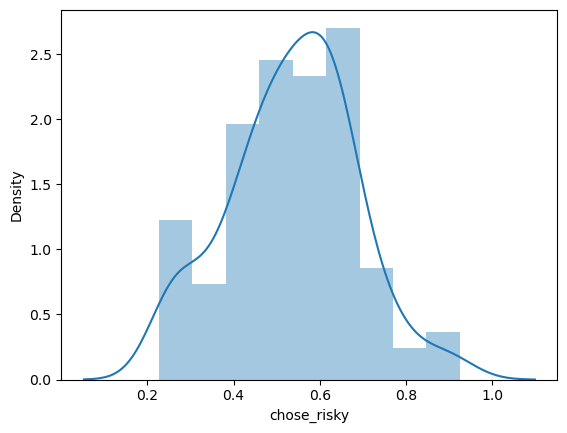

In [24]:
sns.distplot(df.groupby(['subject', 'session'])['chose_risky'].mean())

In [25]:
df['Stimulation condition'] = df.index.get_level_values('stimulation_condition').to_series().map({'vertex':'Vertex', 'ips':'IPS', 'baseline':'Baseline'}).values

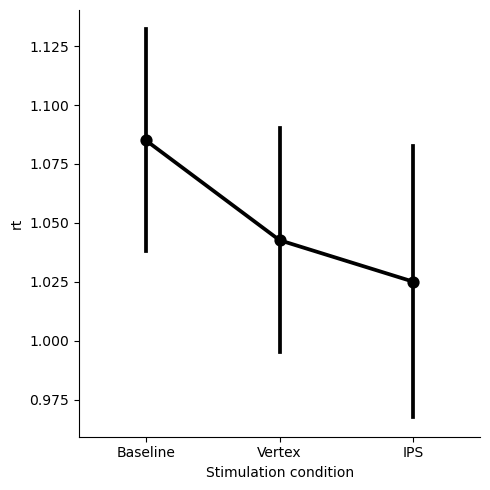

In [26]:
g = sns.catplot(x='Stimulation condition', y='rt', data=df.groupby(['subject', 'Stimulation condition'])[['rt']].mean().reset_index(), kind='point', errorbar='se', color='k', order=['Baseline', 'Vertex', 'IPS'], legend=False,
                dodge=True)
# g.set(ylim=(.4, .6))
# g.set(ylabel='Prop. risky choices', xlabel='Stimulation condition')
# g.map(lambda **kwargs: plt.axhline(.5, color='black', linestyle='--', linewidth=1, zorder=0))
# g.set(ylim=(.45, .65))
# g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'behavior', 'risky_prop.pdf'))

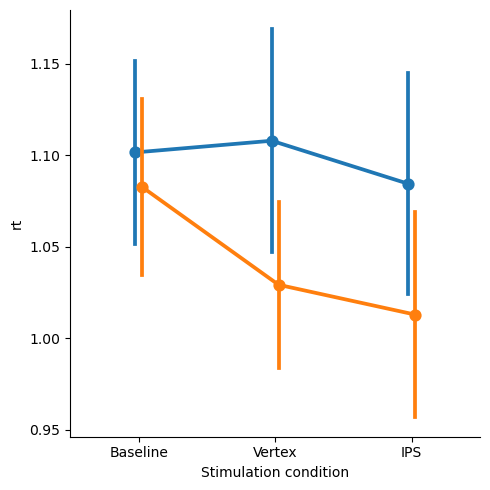

In [27]:
g = sns.catplot(x='Stimulation condition', y='rt', hue='chose_risky',
                data=df.groupby(['subject', 'Stimulation condition', 'chose_risky'])['rt'].mean().reset_index(), kind='point', errorbar='se', order=['Baseline', 'Vertex', 'IPS'], legend=False,
                dodge=True)

In [28]:
pingouin.rm_anova(data=df.drop('baseline', level='stimulation_condition').groupby(['subject', 'Stimulation condition'])['rt'].mean().reset_index(), dv='rt', within=['Stimulation condition'], subject='subject')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Stimulation condition,1,34,0.349162,0.558496,0.000817,1.0


In [30]:
pingouin.rm_anova(data=df.drop('baseline', level='stimulation_condition').groupby(['subject', 'Stimulation condition', 'chose_risky'])['rt'].mean().reset_index(), dv='rt', within=['Stimulation condition', 'chose_risky'], subject='subject')

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Stimulation condition,0.013884,1,34,0.013884,0.653276,0.424563,0.424563,0.000928,1.0
1,chose_risky,0.197593,1,34,0.197593,8.015713,0.007734,0.007734,0.013046,1.0
2,Stimulation condition * chose_risky,0.000457,1,34,0.000457,0.051168,0.822398,0.822398,0.000031,1.0


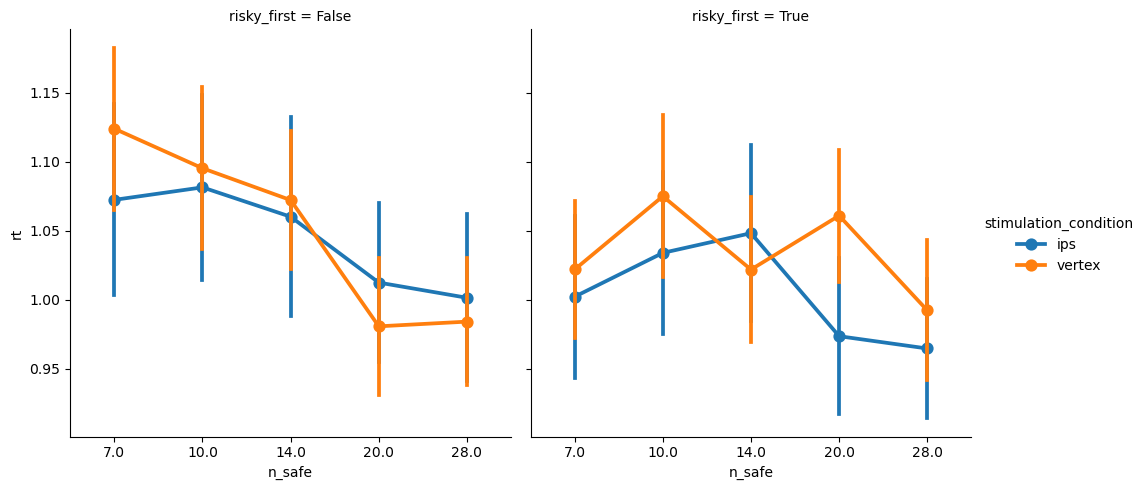

In [31]:
tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'n_safe', 'stimulation_condition', 'risky_first'])['rt'].mean().reset_index()
sns.catplot(x='n_safe', y='rt', hue='stimulation_condition', data=tmp, kind='point', errorbar='se', col='risky_first')

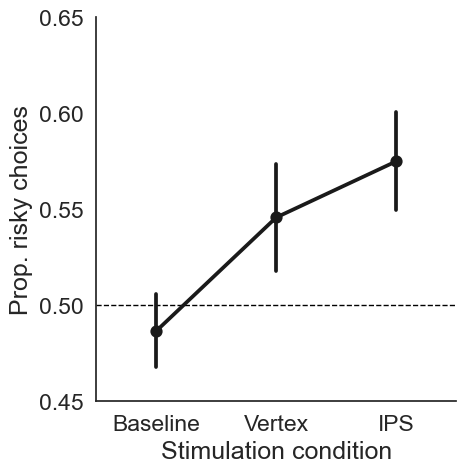

In [32]:
sns.set(font_scale=1.5, style='white')
g = sns.catplot(x='Stimulation condition', y='chose_risky',
                data=df.groupby(['subject', 'Stimulation condition'])['chose_risky'].mean().reset_index(), kind='point', errorbar='se', color='k', order=['Baseline', 'Vertex', 'IPS'], legend=False,
                dodge=True)
# g.set(ylim=(.4, .6))
g.set(ylabel='Prop. risky choices', xlabel='Stimulation condition')
g.map(lambda **kwargs: plt.axhline(.5, color='black', linestyle='--', linewidth=1, zorder=0))
g.set(ylim=(.45, .65))
g.set(ylim=(.45, .65), yticks=np.arange(.45, .7, 0.05))

g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'behavior', 'risky_prop.pdf'))

In [33]:
tmp = df.groupby(['subject', 'stimulation_condition'])['chose_risky'].mean().unstack('stimulation_condition')

pingouin.ttest(tmp['ips'], tmp['vertex'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.338824,34,two-sided,0.189511,"[-0.02, 0.07]",0.185599,0.411,0.187223


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_29055/2238144179.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.catplot(x='Stimulation condition', y='chose_risky',


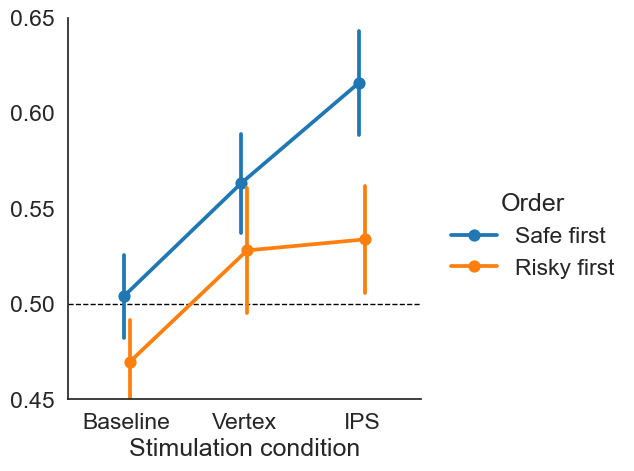

In [34]:
sns.set(font_scale=1.5, style='white')
palette = sns.color_palette("tab10")


g = sns.catplot(x='Stimulation condition', y='chose_risky',
                data=df.groupby(['subject', 'Stimulation condition', 'Order'])['chose_risky'].mean().reset_index(),  hue='Order', kind='point', errorbar='se', 
                hue_order=['Safe first', 'Risky first'], order=['Baseline', 'Vertex', 'IPS'],dodge=True, palette=palette)
# fac.set(ylim=(.4, .6))
g.map(lambda **kwargs: plt.axhline(.5, color='black', linestyle='--', linewidth=1, zorder=0))
g.set(ylabel='Prop. risky choices', xlabel='Stimulation condition')

g.set(ylim=(.45, .65), yticks=np.arange(.45, .7, 0.05), ylabel=None)


g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'behavior', 'risky_prop_order.pdf'))

In [38]:
df.index.unique('subject').shape

(35,)

In [41]:
df.drop(1, level='session').groupby(['subject', 'Stimulation condition', 'Order'])[['chose_risky']].mean().reset_index().groupby(['Order'])[['chose_risky']].mean()

,chose_risky
Order,
Risky first,0.530911
Safe first,0.589586


In [35]:
df.groupby(['subject', 'Stimulation condition', 'Order'])[['chose_risky']].mean().reset_index().groupby(['Stimulation condition', 'Order'])[['chose_risky']].mean()

chose_risky
Stimulation condition Order                   
Baseline              Risky first     0.469494
                      Safe first      0.503898
IPS                   Risky first     0.533796
                      Safe first      0.615870
Vertex                Risky first     0.528026
                      Safe first      0.563302

In [20]:
df['ev1'], df['ev2'] = df['p1'] * df['n1'], df['p2'] * df['n2']

df['ev_chosen'] = df['ev1'].where(df['choice'] == 1, df['ev2'])
df['ev_unchosen'] = df['ev2'].where(df['choice'] == 1, df['ev1'])

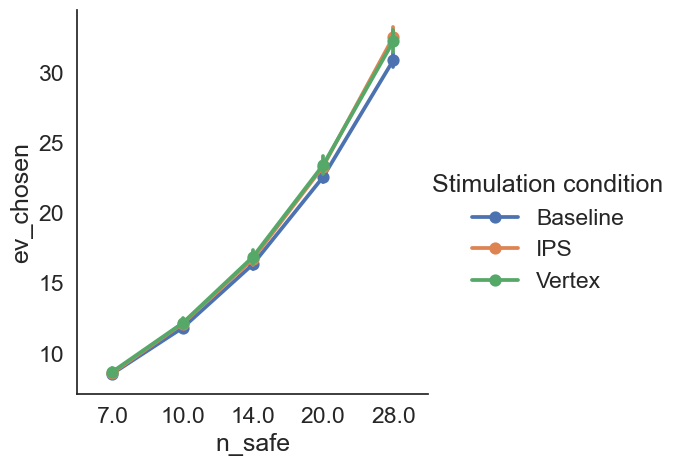

In [21]:
tmp = df.groupby(['subject', 'Stimulation condition', 'n_safe'])[['ev_chosen']].mean().reset_index()

sns.catplot(x='n_safe', y='ev_chosen', hue='Stimulation condition', data=tmp.reset_index(), kind='point', errorbar='se')

<Axes: xlabel='bin(risky/safe)', ylabel='n_safe'>

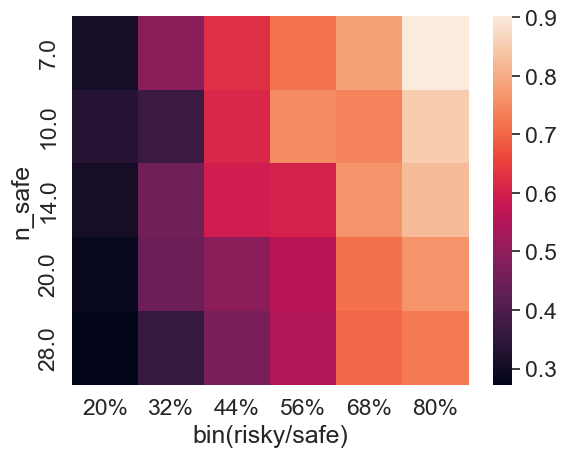

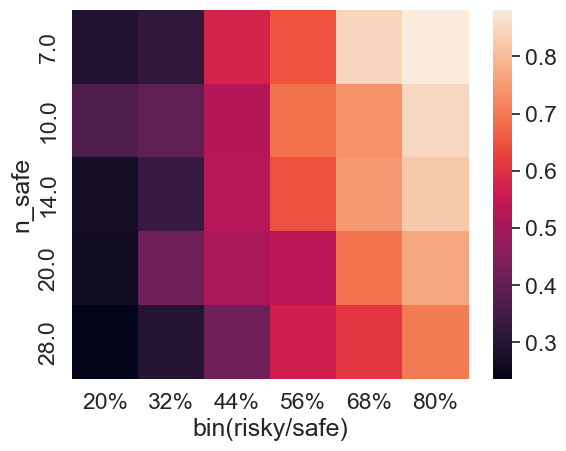

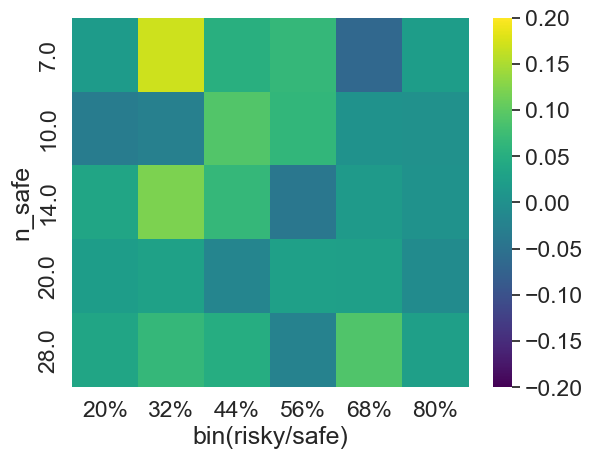

In [43]:

tmp = df.drop('baseline', level='stimulation_condition').groupby(['stimulation_condition', 'n_safe', 'bin(risky/safe)'])['chose_risky'].mean()

tmp = tmp.unstack('bin(risky/safe)')

sns.heatmap(tmp.loc['ips'])

plt.figure()
sns.heatmap(tmp.loc['vertex'])


diff = tmp.loc['ips'] - tmp.loc['vertex']

plt.figure()
sns.heatmap(diff, cmap='viridis', vmin=-.2, vmax=.2)

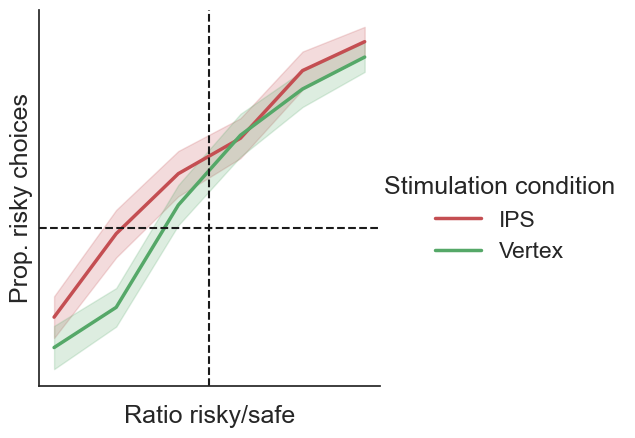

In [85]:
tmp = df.drop('baseline', level='stimulation_condition')
stimulation_palette = sns.color_palette()[2:4]


tmp = tmp.groupby(['subject', 'Stimulation condition', 'bin(risky/safe)', 'Order'])[['chose_risky']].mean().reset_index()

# sns.relplot(x='')

g = sns.relplot(x='bin(risky/safe)', y='chose_risky', data=tmp[tmp['Order']  == 'Safe first'].reset_index(), kind='line',
            hue='Stimulation condition', errorbar='se', palette=stimulation_palette[::-1],
            linewidth=2.5)

g.set_xticklabels([])
g.set_xlabels('Ratio risky/safe')
g.set_ylabels('Prop. risky choices')
g.set(yticks=[])
# g.set(ylim=(.45, .65))
# g.map_dataframe(plt.axhline, x=.5)

plt.axhline(0.5, c='k', ls='--')

plt.axvline(np.mean(plt.xlim()), c='k', ls='--')

plt.savefig('/Users/gdehol/Downloads/prop_risky_choices.pdf')

In [80]:
tmp2 = tmp.set_index(['subject', 'Order','Stimulation condition', 'bin(risky/safe)'])['chose_risky'].unstack('Stimulation condition')

tmp2.groupby('bin(risky/safe)').apply(lambda d: pingouin.ttest(d['IPS'], d['Vertex'], paired=True))

,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
bin(risky/safe),,,,,,,,,
20%,T-test,0.569164,69,two-sided,0.571093,"[-0.04, 0.07]",0.066355,0.153,0.084984
32%,T-test,2.263741,69,two-sided,0.026738,"[0.01, 0.14]",0.329281,1.424,0.775317
44%,T-test,2.022391,69,two-sided,0.047014,"[0.0, 0.1]",0.216356,0.892,0.430627
56%,T-test,0.391463,69,two-sided,0.696661,"[-0.05, 0.08]",0.051838,0.141,0.071207
68%,T-test,0.751998,67,two-sided,0.454686,"[-0.03, 0.07]",0.088493,0.175,0.111057
80%,T-test,0.377827,69,two-sided,0.706719,"[-0.04, 0.06]",0.050501,0.141,0.070116


In [81]:
tmp2

Stimulation condition                     IPS    Vertex
subject Order       bin(risky/safe)                    
1       Risky first 20%              0.300000  0.300000
                    32%              0.300000  0.200000
                    44%              0.416667  0.416667
                    56%              0.625000  0.500000
                    68%              0.900000  0.800000
...                                       ...       ...
74      Safe first  32%              0.200000  0.000000
                    44%              0.000000  0.000000
                    56%              0.200000  0.200000
                    68%              0.300000  0.400000
                    80%              0.600000  0.700000

[418 rows x 2 columns]

In [39]:
df[['ev_chosen', 'ev_unchosen']].describe()

,ev_chosen,ev_unchosen
count,12481.000000,12481.000000
mean,18.497236,17.218136
std,10.058631,10.493934
min,3.850000,3.850000
25%,10.000000,10.000000
50%,15.950000,14.000000
75%,25.850000,22.000000
max,61.600000,61.600000


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_73615/3108694767.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'Stimulation condition', 'Order', 'n_safe']).mean().reset_index()


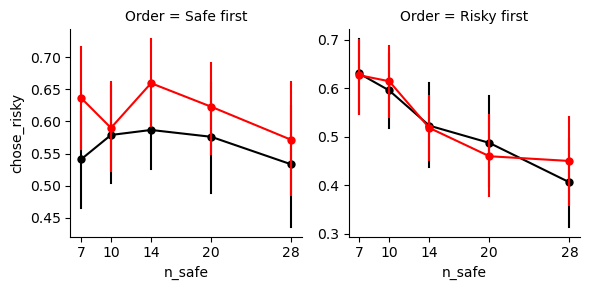

In [53]:
tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'Stimulation condition', 'Order', 'n_safe']).mean().reset_index()
g = sns.FacetGrid(tmp.reset_index(),
                  col='Order', hue='Stimulation condition', col_order=['Safe first', 'Risky first'], hue_order=['Vertex', 'IPS'], sharey=False,
                  palette=['k', 'red'])
g.set(xticks=[7, 10, 14, 20, 28])
# g.map(sns.lineplot, 'n_safe', 'chose_risky', marker={'marker':'o'}, err_style='bars')

g.map_dataframe(sns.lineplot, x="n_safe", y="chose_risky", markeredgecolor='none', err_style='bars', marker='o')

g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'behavior', 'risky_prop_order_nsafe.pdf'))

In [47]:
sns.__version__

'0.12.1'

AttributeError: PathCollection.set() got an unexpected keyword argument 'err_style'

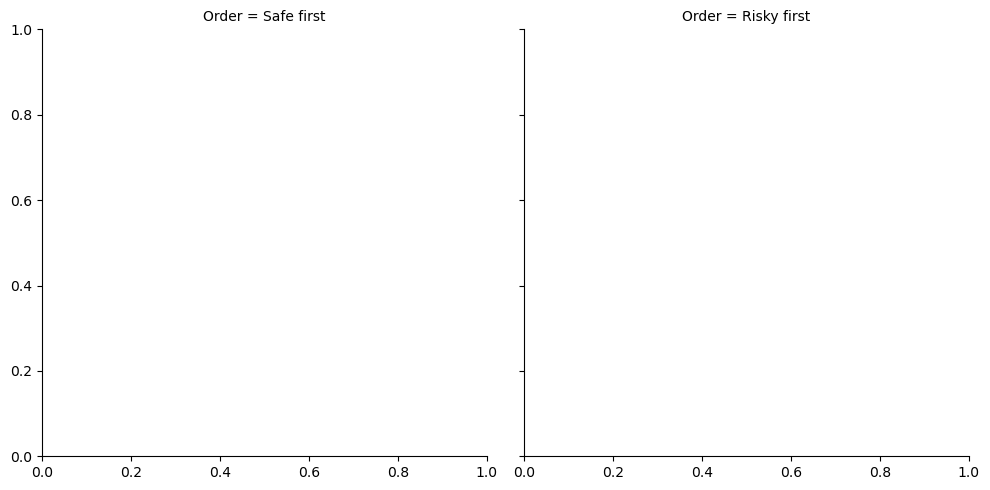

In [45]:

sns.relplot(tmp, x='n_safe', y='chose_risky', hue='Stimulation condition', col='Order', col_order=['Safe first', 'Risky first'], hue_order=['Vertex', 'IPS'], err_style='bars', marker='o',
            edgecolor=None)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_93719/2310480140.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.catplot(data=df.drop('baseline', level='stimulation_condition').groupby(['subject', 'Stimulation condition', 'Order', 'n_safe']).mean().reset_index(),


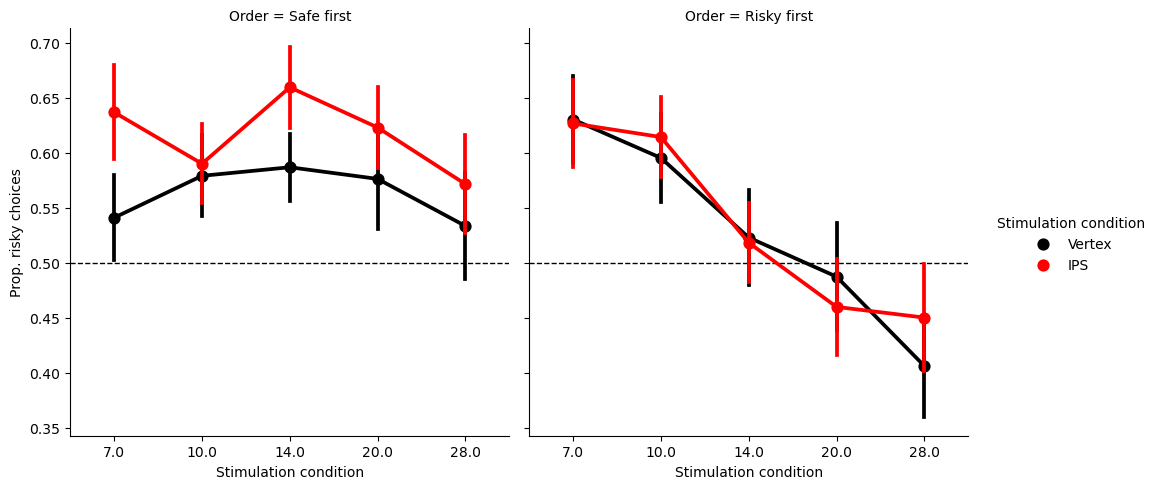

In [127]:
g = sns.catplot(data=df.drop('baseline', level='stimulation_condition').groupby(['subject', 'Stimulation condition', 'Order', 'n_safe']).mean().reset_index(),
                  hue='Stimulation condition', col='Order', palette=['k', 'red'],hue_order=['Vertex', 'IPS'], col_order=['Safe first', 'Risky first'],
                  x='n_safe', y='chose_risky', kind='point', errorbar='se', )
g.map(lambda **kwargs: plt.axhline(.5, color='black', linestyle='--', linewidth=1, zorder=0))
g.set(ylabel='Prop. risky choices', xlabel='Stimulation condition')

# g.set(ylim=(.45, .65))

# g.add_legend()
# g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'behavior', 'raw_key_effect.pdf'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_93719/1154168314.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fac = sns.catplot(hue='stimulation_condition', y='chose_risky', data=df.groupby(['subject', 'stimulation_condition', 'Order']).mean().reset_index(),  x='Order', kind='point', errorbar='se')


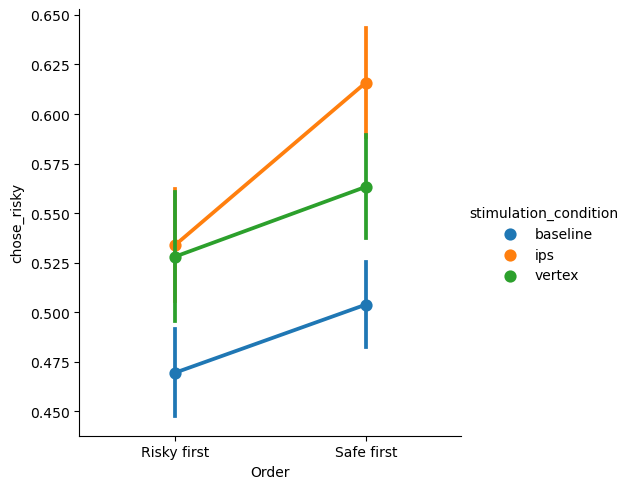

In [61]:
fac = sns.catplot(hue='stimulation_condition', y='chose_risky', data=df.groupby(['subject', 'stimulation_condition', 'Order']).mean().reset_index(),  x='Order', kind='point', errorbar='se')
# fac.set(ylim=(.4, .6))


In [16]:
tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'stimulation_condition', 'Order']).mean().reset_index()

pingouin.rm_anova(tmp, dv='chose_risky', within=['stimulation_condition', 'Order'], subject='subject')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_93719/4075258166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'stimulation_condition', 'Order']).mean().reset_index()


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,stimulation_condition,0.029779,1,34,0.029779,1.792365,0.189522,0.189522,0.007578,1.0
1,Order,0.120497,1,34,0.120497,10.224865,0.002993,0.002993,0.029971,1.0
2,stimulation_condition * Order,0.019162,1,34,0.019162,4.999731,0.032022,0.032022,0.004889,1.0


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_93719/3505991418.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fac = sns.catplot(x='stimulation_condition', y='rt', data=df.groupby(['subject', 'stimulation_condition']).median().reset_index(), kind='point', ci=67)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_93719/3505991418.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  fac = sns.catplot(x='stimulation_condition', y='rt', data=df.groupby(['subject', 'stimulation_condition']).median().reset_index(), kind='point', ci=67)


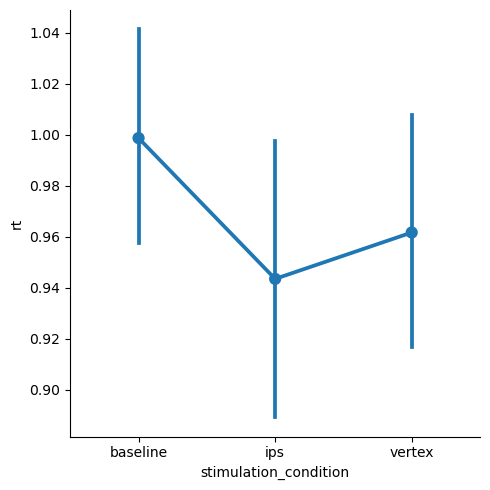

In [12]:
fac = sns.catplot(x='stimulation_condition', y='rt', data=df.groupby(['subject', 'stimulation_condition']).median().reset_index(), kind='point', ci=67)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.338824,34,two-sided,0.189511,"[-0.02, 0.07]",0.185599,0.411,0.187223


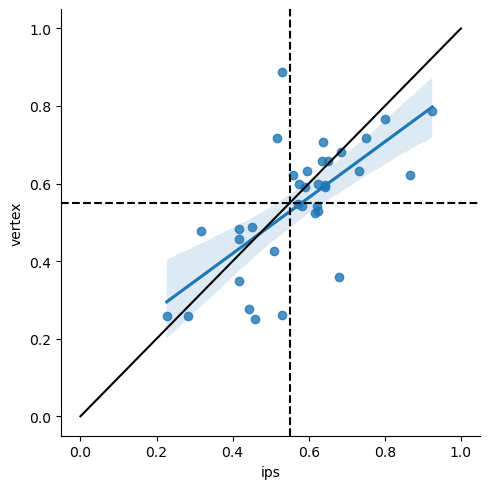

In [13]:
tmp = df.groupby(['subject', 'stimulation_condition'])['chose_risky'].mean().unstack('stimulation_condition')

sns.lmplot(x='ips', y='vertex', data=tmp)
plt.plot([0, 1.], [0, 1.], c='k')
plt.axvline(.55, c='k', ls='--')
plt.axhline(.55, c='k', ls='--')
pingouin.ttest(tmp['ips'], tmp['vertex'], paired=True)


In [15]:
pingouin.linear_regression(tmp['ips'], tmp['vertex'], add_intercept=False)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,ips,0.934818,0.035972,25.987055,5.173918e-24,0.952067,0.950657,0.861713,1.007923


# Raw risky choice x risky_first

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_88236/3427190866.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_88236/3427190866.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(y='chose_risky', hue='stimulation_condition', x='risky_first', data=tmp.reset_index(), kind='point', ci=67)


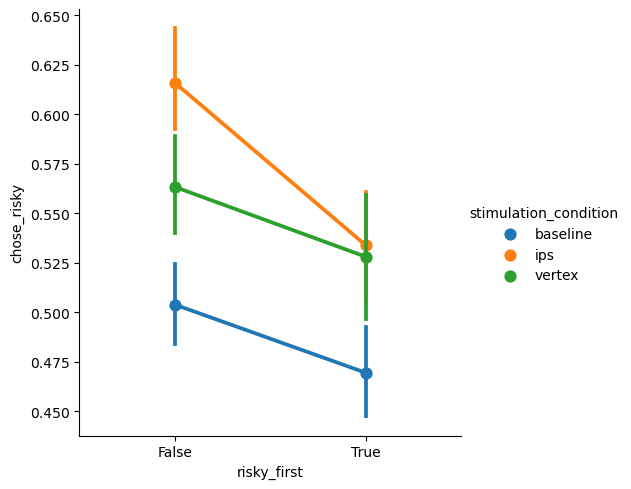

In [20]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()

sns.catplot(y='chose_risky', hue='stimulation_condition', x='risky_first', data=tmp.reset_index(), kind='point', ci=67)

In [55]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()
pingouin.rm_anova(tmp.drop('baseline', 0, level='stimulation_condition').reset_index(), 'chose_risky', within=['risky_first', 'stimulation_condition'], subject='subject')



/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_88236/395853656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_88236/395853656.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pingouin.rm_anova(tmp.drop('baseline', 0, level='stimulation_condition').reset_index(), 'chose_risky', within=['risky_first', 'stimulation_condition'], subject='subject')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included 

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,risky_first,0.120497,1,34,0.120497,10.224865,0.002993,0.002993,0.029971,1.0
1,stimulation_condition,0.029779,1,34,0.029779,1.792365,0.189522,0.189522,0.007578,1.0
2,risky_first * stimulation_condition,0.019162,1,34,0.019162,4.999731,0.032022,0.032022,0.004889,1.0


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_88236/3099353105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'bin(risky/safe)']).mean()


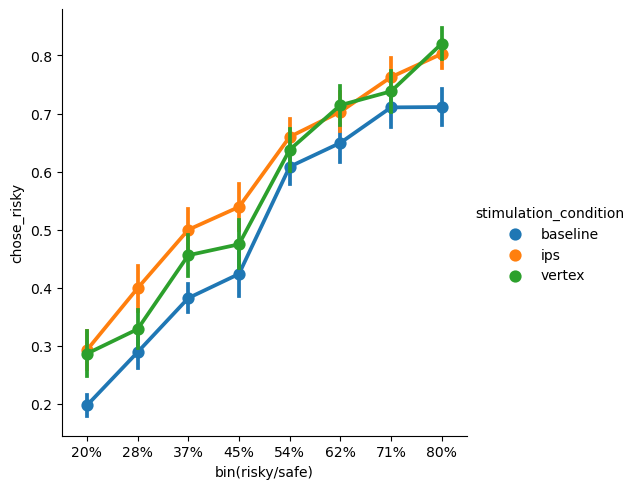

In [57]:
tmp = df.groupby(['subject', 'stimulation_condition', 'bin(risky/safe)']).mean()

sns.catplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', data=tmp.reset_index(), kind='point', errorbar='se')

In [59]:
pingouin.rm_anova(tmp.drop('baseline', level='stimulation_condition').reset_index(), subject='subject', dv='chose_risky', within=['bin(risky/safe)', 'stimulation_condition'],)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,bin(risky/safe),17.178787,7,231,2.454112,107.266446,5.998320e-69,5.006075e-36,0.446925,0.504287
1,stimulation_condition,0.123003,1,33,0.123003,1.954364,1.714440e-01,1.714440e-01,0.005753,1.000000
2,bin(risky/safe) * stimulation_condition,0.125796,7,231,0.017971,1.432113,1.932191e-01,2.192432e-01,0.005882,0.665321


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_88236/1700274759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'bin(risky/safe)']).mean()


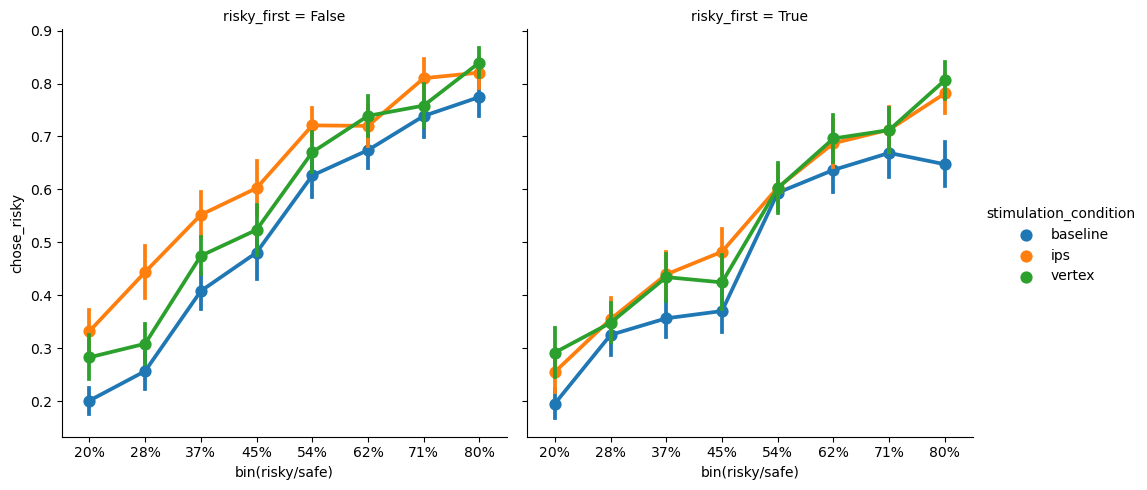

In [60]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'bin(risky/safe)']).mean()

sns.catplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', errorbar='se')

In [37]:
pingouin.rm_anova(tmp.xs(True, 0, 'risky_first').drop('baseline', level='stimulation_condition').reset_index(), subject='subject', dv='chose_risky', within=['bin(risky/safe)', 'stimulation_condition'],)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,bin(risky/safe),16.974633,7,231,2.424948,63.599170,2.119129e-50,1.304467e-33,0.343468,0.649510
1,stimulation_condition,0.002214,1,33,0.002214,0.023620,8.787922e-01,8.787922e-01,0.000068,1.000000
2,bin(risky/safe) * stimulation_condition,0.087363,7,231,0.012480,0.476594,8.510547e-01,8.056016e-01,0.002685,0.765382


In [38]:
pingouin.rm_anova(tmp.xs(False, 0, 'risky_first').drop('baseline', level='stimulation_condition').reset_index(), subject='subject', dv='chose_risky', within=['bin(risky/safe)', 'stimulation_condition'],)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,bin(risky/safe),17.615361,7,231,2.516480,67.336394,2.771043e-52,1.946808e-32,0.384320,0.601357
1,stimulation_condition,0.429203,1,33,0.429203,5.998839,1.979261e-02,1.979261e-02,0.014981,1.000000
2,bin(risky/safe) * stimulation_condition,0.356028,7,231,0.050861,1.814363,8.536948e-02,1.118000e-01,0.012459,0.722190


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/110103595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/110103595.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='n_safe', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)


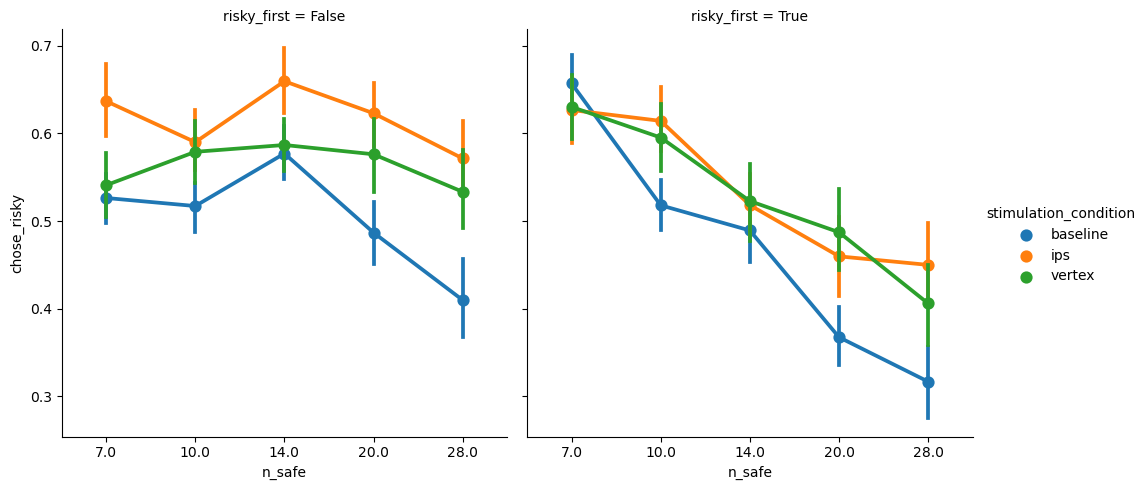

In [14]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe']).mean()

sns.catplot(x='n_safe', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)

In [15]:
import pingouin

In [16]:
tmp['chose_risky'].unstack('stimulation_condition')

stimulation_condition       baseline       ips    vertex
subject risky_first n_safe                              
1       False       7.0     0.583333  0.750000  0.636364
                    10.0    0.250000  0.750000  0.333333
                    14.0    0.416667  0.583333  0.583333
                    20.0    0.416667  0.666667  0.583333
                    28.0    0.500000  0.583333  0.666667
...                              ...       ...       ...
74      True        7.0     0.666667  0.666667  0.333333
                    10.0    0.666667  0.416667  0.333333
                    14.0    0.583333  0.333333  0.166667
                    20.0    0.333333  0.250000  0.333333
                    28.0    0.166667  0.083333  0.333333

[350 rows x 3 columns]

In [17]:
tmp['chose_risky'].unstack('stimulation_condition').groupby(['bin(risky/safe)', 'risky_first']).apply(lambda d: pingouin.ttest(d['vertex'], d['ips'], paired=True))

KeyError: 'bin(risky/safe)'

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_27586/2617894703.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='bin(risky/safe)', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)


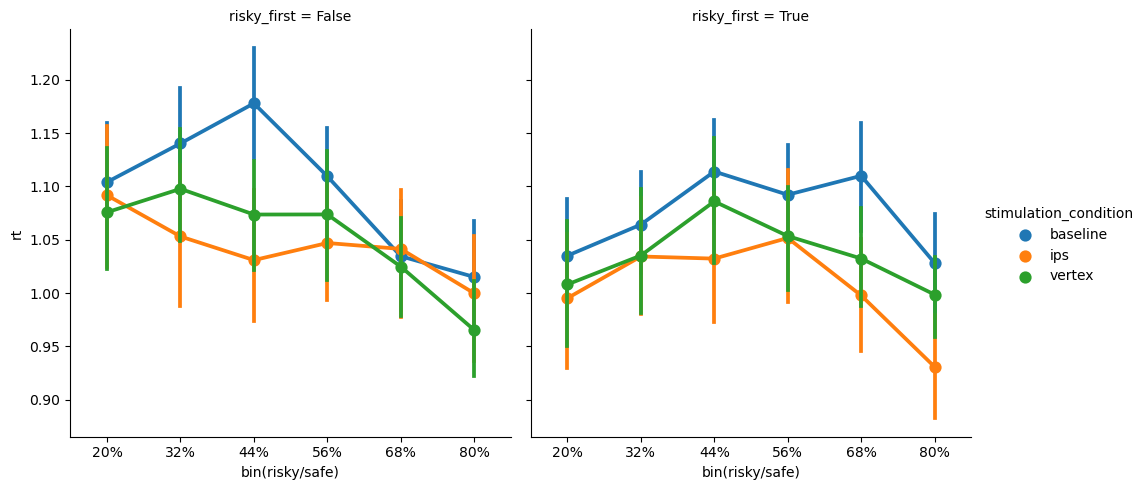

In [ ]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'bin(risky/safe)']).mean()

sns.catplot(x='bin(risky/safe)', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_27586/3723513800.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe', 'chose_risky']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_27586/3723513800.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='n_safe', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67, row='chose_risky')


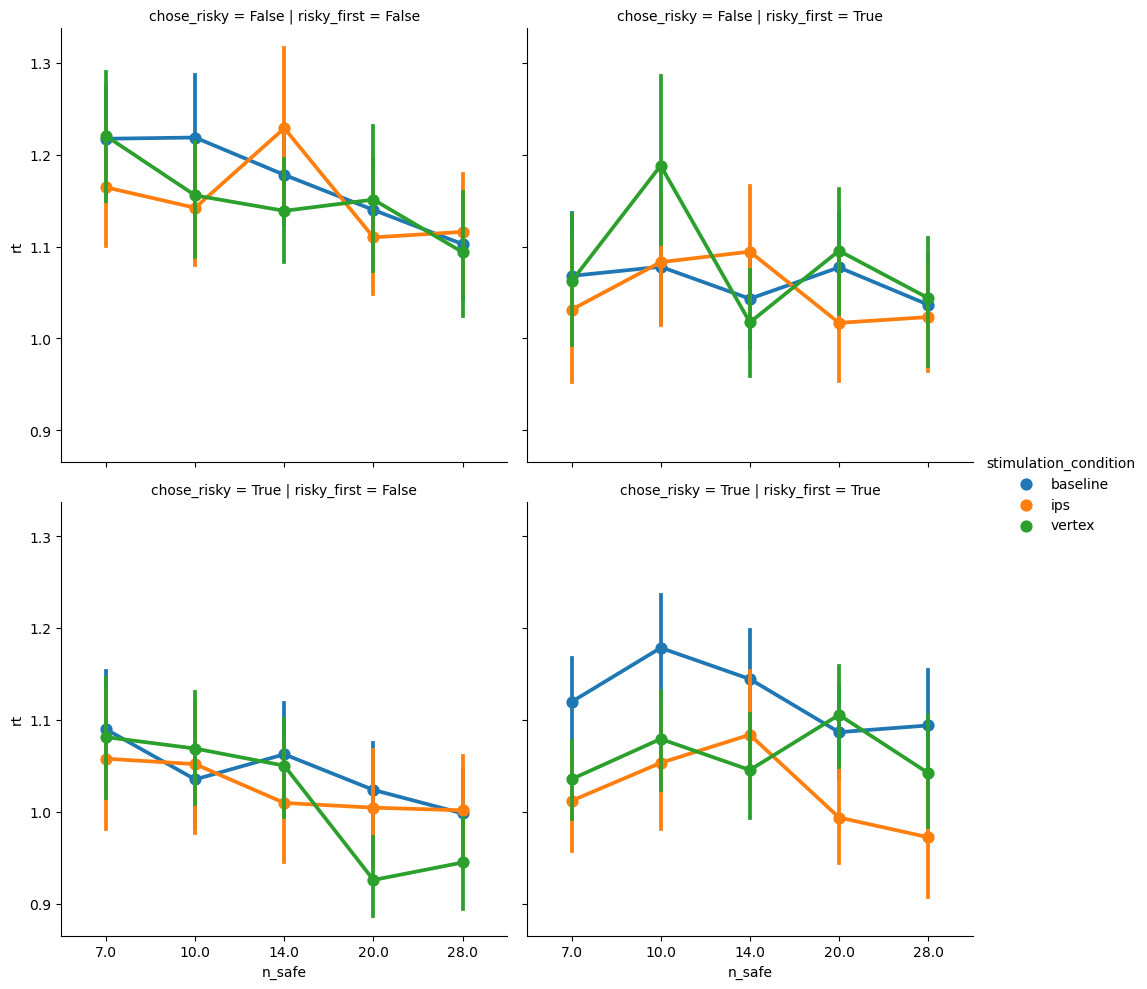

In [ ]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe', 'chose_risky']).mean()

sns.catplot(x='n_safe', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67, row='chose_risky')